In [31]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Import Data

In [33]:
df = pd.read_csv("data/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [34]:
df = df.drop(columns=["id"], axis=1)

target = ["Class"]
features = [column for column in df.columns if column not in target]

# Describe

In [35]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [36]:
df['Class'] = df['Class'].astype('category')

In [37]:
df.describe(include=['category'])

,Class
count,568630
unique,2
top,0
freq,284315


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   V1      568630 non-null  float64 
 1   V2      568630 non-null  float64 
 2   V3      568630 non-null  float64 
 3   V4      568630 non-null  float64 
 4   V5      568630 non-null  float64 
 5   V6      568630 non-null  float64 
 6   V7      568630 non-null  float64 
 7   V8      568630 non-null  float64 
 8   V9      568630 non-null  float64 
 9   V10     568630 non-null  float64 
 10  V11     568630 non-null  float64 
 11  V12     568630 non-null  float64 
 12  V13     568630 non-null  float64 
 13  V14     568630 non-null  float64 
 14  V15     568630 non-null  float64 
 15  V16     568630 non-null  float64 
 16  V17     568630 non-null  float64 
 17  V18     568630 non-null  float64 
 18  V19     568630 non-null  float64 
 19  V20     568630 non-null  float64 
 20  V21     568630 non-null  f

# Missing Values

<Axes: >

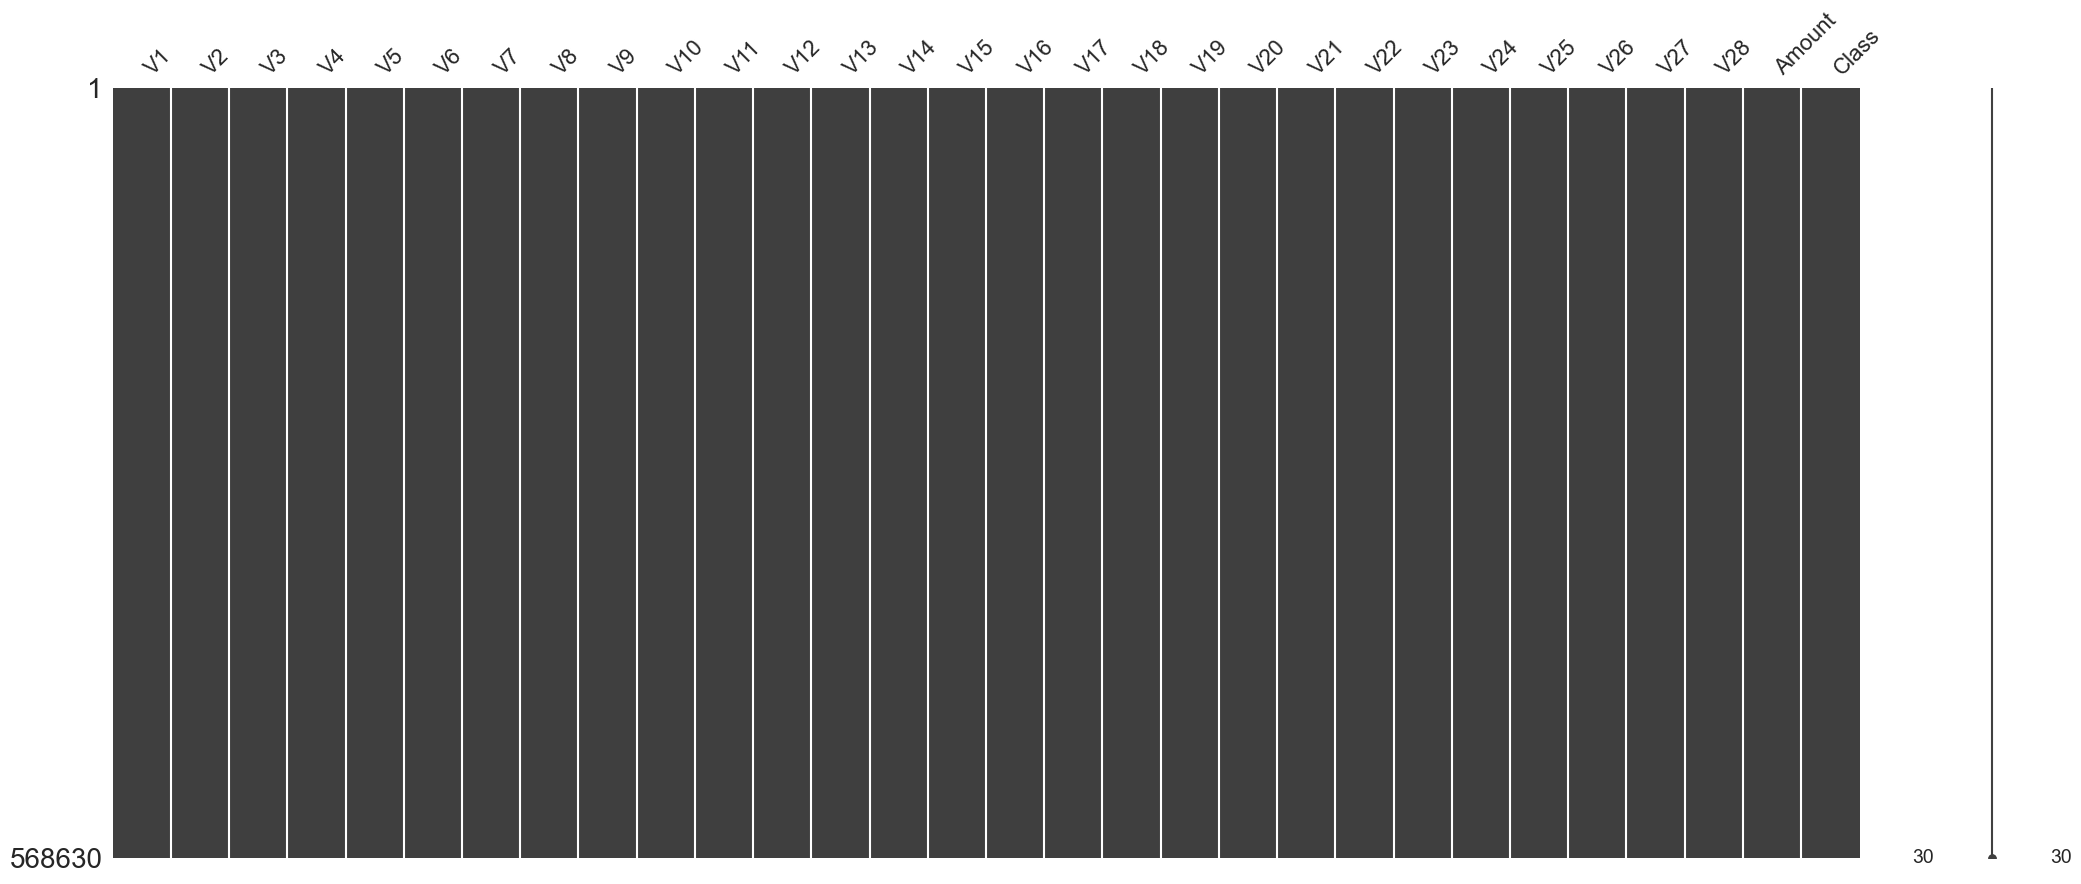

In [39]:
import missingno as msno
msno.matrix(df)

In [40]:
from common import null_table

null_table_train = null_table(df)

null_table_train.sort_values(
    by='Percentage', 
    ascending=False
)

,Columns,Null Count,Percentage


# Duplicates

In [41]:
duplicates_mask = df.duplicated(subset=features, keep=False)
duplicates_mask.sum()

2

In [42]:
df = df.drop_duplicates(subset=features, keep=False)

# Class Imbalance

No class imbalance in the dataset.

In [43]:
df['Class'].astype('category', copy=False).value_counts()

Class
0    284315
1    284313
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

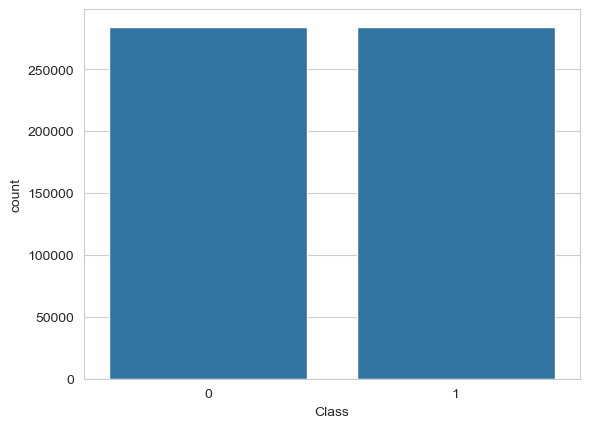

In [44]:
sns.countplot(data=df, x='Class')

# Skew Handling

In [45]:
df.skew(numeric_only=True)

V1        -0.083419
V2        -1.398034
V3         0.014616
V4        -0.044164
V5         1.506411
V6        -0.201706
V7        19.027394
V8         0.300736
V9         0.171060
V10        0.740408
V11       -0.020884
V12        0.066753
V13        0.014910
V14        0.207829
V15        0.011230
V16        0.266402
V17        0.373055
V18        0.129184
V19       -0.010173
V20       -1.556394
V21       -0.110796
V22        0.319475
V23       -0.100539
V24        0.066083
V25        0.023012
V26       -0.018961
V27        2.755485
V28        1.725005
Amount     0.001659
dtype: float64

There is some skew in the data. We will use the Yeo-Johnson transformation to fix the skewness.

In [46]:
from common import fix_skewness_yeojohnson

df = fix_skewness_yeojohnson(df, skew_threshold=0.5)
df.shape

(568628, 30)

# Data Splitting

In [47]:
X = df.drop(columns="Class", axis=1)
y = df['Class']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y
)

# Transforms

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# PCA - Find n_components

In [50]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

PCA()

In [51]:
X_train_pca = pca.transform(X_train) 

In [52]:
print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_pca.shape)

Original shape: (454902, 29)
Reduced shape: (454902, 29)


In [53]:
pca.explained_variance_ratio_

array([0.34002468, 0.09774157, 0.06651526, 0.06354094, 0.04477807,
       0.03660986, 0.03459105, 0.034365  , 0.02986148, 0.02842692,
       0.02586873, 0.02098861, 0.01900642, 0.01730009, 0.01679281,
       0.01394264, 0.01331585, 0.01216524, 0.0119388 , 0.00981061,
       0.00956477, 0.00852273, 0.00801542, 0.00708892, 0.00673276,
       0.00648306, 0.00623602, 0.00598885, 0.00378283])

In [54]:
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()
cumulative_variance_ratio

array([0.34002468, 0.43776625, 0.50428152, 0.56782245, 0.61260052,
       0.64921038, 0.68380143, 0.71816643, 0.74802791, 0.77645483,
       0.80232355, 0.82331217, 0.84231859, 0.85961868, 0.87641149,
       0.89035413, 0.90366999, 0.91583522, 0.92777402, 0.93758464,
       0.94714941, 0.95567214, 0.96368756, 0.97077648, 0.97750924,
       0.9839923 , 0.99022832, 0.99621717, 1.        ])

Let's choose the number of components that explain 95% of the variance.

In [55]:
chosen_variance: float = 0.95
n_components = sum(pca.explained_variance_ratio_.cumsum() < chosen_variance) + 1
print(f"Components needed for 95% variance: {n_components}")

Components needed for 95% variance: 22


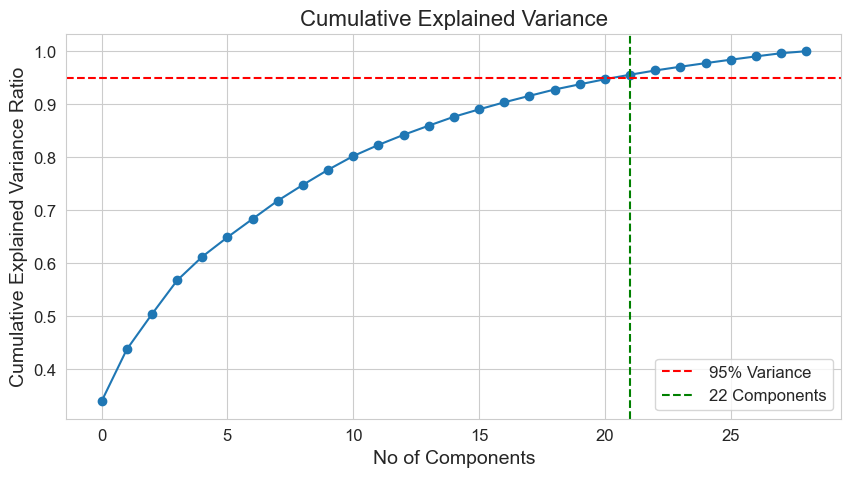

In [56]:
plt.figure(figsize=(10, 5))

plt.plot(
    range(0, len(pca.explained_variance_ratio_)), 
    cumulative_variance_ratio, 
    "o-"
)

plt.xlabel("No of Components", fontsize=14)
plt.ylabel("Cumulative Explained Variance Ratio", fontsize=14)
plt.title("Cumulative Explained Variance", fontsize=16)

plt.axhline(
    y=chosen_variance, 
    color="r", linestyle="--", 
    label="95% Variance"
)

plt.axvline(
    x=n_components - 1, 
    color="g", linestyle="--", 
    label=f"{n_components} Components"
)

plt.legend(fontsize=12)

plt.tick_params(axis="both", which="major", labelsize=12)

plt.show()